###### Step 1: Importing Libraries(Using Darts for timeseries forecasting)

In [1]:
from darts import TimeSeries
import pandas as pd

###### Step 2: Importing covid cases data from covid19h (Source: John Hopkins) from 1st November and relevant data for analysis

In [2]:
# Importing data obtained from Data Acquisition Team (This data contains 40% of seating capacity)
data = pd.read_csv('data_sa_new.csv')
data["day"] = pd.to_datetime(data.day, format='%Y-%m-%d')

In [3]:
countries = list(data["dest cou"].unique())

In [4]:
from datetime import datetime
from covid19dh import covid19
x, src = covid19(countries, start = datetime(2021,11,1), end = "2022-03-04")
x["date"] = pd.to_datetime(x['date']).dt.date

C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: F

C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: F

C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: F

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:85: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  src = src.append(sources[
C:\Users\Aditya\anaconda3\lib\site-packages\covid19dh\_cite.py:96: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  references = references.append(src)


###### Step3: Data Preparation for Analysis

In [5]:
# Divinding data based on the country
import numpy as np
countries=list(data["Countries"].unique())
countries_data=[data.loc[data["Countries"] == i] for i in countries]
start, end = list(countries_data[0].day)[0],list(countries_data[0].day)[-1]
dt_ran = pd.date_range(start=start,end=end,freq="D")
t_index=pd.DatetimeIndex(dt_ran)
countries_data = [i.set_index("day").reindex(t_index).fillna(0).reset_index() for i in countries_data]
for i in countries_data:
    pop_d = [i for i in list(i['Population Density'].unique()) if i!=0]
    dest_cnt = [i for i in list(i['dest cou'].unique()) if i!=0]
    i['Population Density'] = i['Population Density'].replace(0,pop_d[0]).values
    i['dest cou'] = i['dest cou'].replace(0,dest_cnt[0]).values
    i['Seats'] = i['Seats'].cumsum()

In [6]:
# Mapping covid cases to each country
import datetime
for cnt in countries_data:
    cases=[]
    population = []
    for index,i in list(cnt.iterrows()):
        start = i["index"]+datetime.timedelta(days=2)
        end = i["index"]+datetime.timedelta(days=1)
        y = x[x["iso_alpha_2"]==i["dest cou"]]
        date_range = y[(y["date"]>=end) & (y["date"]<=start)]
        confirmed = list(date_range["confirmed"])
        if(len(confirmed)>1):
            cases.append(confirmed[1]-confirmed[0])
        else:
            cases.append(cases[-1])
        population.append(list(y["population"])[0])
    cnt["cases"] = cases
    cnt["Population"] = population

C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-compara

C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)
C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-compara

C:\Users\Aditya\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [7]:
data = pd.concat(countries_data)

###### Step4: Conversion to time series

In [8]:
series_main = [TimeSeries.from_dataframe(i, 'index', ['cases',"Seats"],fill_missing_dates=False, freq='D') for i in countries_data]

###### Step5:  Standardization of Data

In [9]:
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_cases = [Scaler(scaler) for i in series_main]
scaler_seats = [Scaler(scaler) for i in series_main]
series_cases =  [y.fit_transform(i["cases"]) for y,i in zip(scaler_cases,series_main)]
series_seats =  [y.fit_transform(i["Seats"]) for y,i in zip(scaler_seats,series_main)]

In [10]:
series = [i.concatenate(j,axis="component") for i, j in zip(series_cases,series_seats)]

###### Step6: Applying Algorithms on data

###### Step6.1: LSTM

In [42]:
from darts.models import BlockRNNModel
# Model takes minimum 10 days and forecasts maximum 20 days of future data
model = BlockRNNModel(input_chunk_length =10,output_chunk_length=20,model="LSTM")
model.fit([i[0:53] for i in series])

2022-08-26 19:58:21 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-08-26 19:58:21 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-08-26 19:58:21 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-08-26 19:58:21 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-08-26 19:58:21 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.9 K 
4 | fc            | Sequential       | 1.0 K 
---------------------------------------------------
3.9 K     Trainable params
0         Non-trainable params
3.9 K     Total params
0.032     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

2022-08-26 20:00:14 pytorch_lightning.utilities.rank_zero INFO: `Trainer.fit` stopped: `max_epochs=100` reached.


###### Step6.1.1: Inverse Standardization

In [ ]:
pred = model.predict(n=10,series=series[4][53:63])

inverse_series_cases = [scaler_cases[index].inverse_transform(i["cases"][:94]) for index,i in enumerate(series)]
inverse_series_seats = [scaler_seats[index].inverse_transform(i["Seats"][:94]) for index,i in enumerate(series)]
inverse_pred_cases = scaler_cases[4].inverse_transform(pred["cases"])
inverse_pred_seats = scaler_seats[4].inverse_transform(pred["Seats"])


In [ ]:
# Plotting actual against forecast for a random country
import matplotlib.pyplot as plt
inverse_series_cases[4][53:73]["cases"].plot(label="actual")
inverse_pred_cases.plot(label="forecast")

###### Step6.1.2: Calculating error percentage ((actual-forecast)*100/actual)

In [ ]:
forecast_data = []
mape_nos = []
inverse_series_cases = [scaler_cases[index].inverse_transform(i["cases"][:94]) for index,i in enumerate(series)]
for index,i in enumerate(countries):
    pred = model.predict(n=11,series=series[index][53:73])
    inverse_pred_cases = scaler_cases[index].inverse_transform(pred["cases"])
    print(i)
    print("MAE for cases = {:.2f}".format(mae(inverse_series_cases[index],inverse_pred_cases)))
    mae_no = mae(inverse_series_cases[index],inverse_pred_cases)
    mape_no = mae_no/(int(inverse_series_cases[index].pd_dataframe().max())+1)*100
    mape_nos.append(mape_no)
    print(inverse_series_cases[index].pd_dataframe().max())
    forecast_df = inverse_pred_cases.pd_dataframe().reset_index()
    forecast_df["Country"] = i 
    forecast_data.append(forecast_df)

###### Step6.1.3: Plotting the errors of country as bar plots

In [ ]:
first=len([i for i in mape_nos if i<10])
second=len([i for i in mape_nos if i>10 and i<30])
third = len([i for i in mape_nos if i>30 and i<50])
fourth = len([i for i in mape_nos if i>50])

weights = [1,2,3,4]
bars_list = [first,second,third,fourth]

import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
ax1 = plt.subplot(1,1,1)
ax1.set_xticks(x)
ax1.set_yticks(bars_list)
plt.bar(x,bars_list)
ax1.set_xticklabels(["<10","10-20","20-30",">30"]) 
ax1.set_yticklabels(bars_list)
plt.ylabel("No.of MAPE in the range")
plt.xlabel("MAPE ranges")
plt.show()

In [ ]:
pd.concat(forecast_data).to_csv("cases_forecast.csv")

###### Step 6.2: Applying Deep AR

In [ ]:
from darts.models import RNNModel

model = RNNModel(input_chunk_length =10,output_chunk_length=20,model="GRU")
model.fit([i[0:53] for i in series])

###### Step6.2.1: Inverse Standardization

In [ ]:
pred = model.predict(n=20,series=series[0][53:73])

inverse_series_cases = [scaler_cases[index].inverse_transform(i["cases"][:94]) for index,i in enumerate(series)]
inverse_series_seats = [scaler_seats[index].inverse_transform(i["Seats"][:94]) for index,i in enumerate(series)]
inverse_pred_cases = scaler_cases[0].inverse_transform(pred["cases"])
inverse_pred_seats = scaler_seats[0].inverse_transform(pred["Seats"])

import matplotlib.pyplot as plt
inverse_series_cases[0].plot(label="actual")
inverse_pred_cases.plot(label="forecast")

###### Step6.2.2: Calculating error percentage ((actual-forecast)*100/actual)

In [ ]:
forecast_data = []
mape_nos = []
inverse_series_cases = [scaler_cases[index].inverse_transform(i["cases"][:94]) for index,i in enumerate(series)]
for index,i in enumerate(countries):
    pred = model.predict(n=11,series=series[index][53:73])
    inverse_pred_cases = scaler_cases[index].inverse_transform(pred["cases"])
    print(i)
    print("MAE for cases = {:.2f}".format(mae(inverse_series_cases[index],inverse_pred_cases)))
    mae_no = mae(inverse_series_cases[index],inverse_pred_cases)
    mape_no = mae_no/(int(inverse_series_cases[index].pd_dataframe().max())+1)*100
    mape_nos.append(mape_no)
    print(inverse_series_cases[index].pd_dataframe().max())
    forecast_df = inverse_pred_cases.pd_dataframe().reset_index()
    forecast_df["Country"] = i 
    forecast_data.append(forecast_df)

###### Step6.2.3: Plotting the errors of country as bar plots

In [ ]:
first=len([i for i in mape_nos if i<10])
second=len([i for i in mape_nos if i>10 and i<20])
third = len([i for i in mape_nos if i>20 and i<30])
fourth = len([i for i in mape_nos if i>30])

weights = [1,2,3,4]
bars_list = [first,second,third,fourth]

import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
ax1 = plt.subplot(1,1,1)
ax1.set_xticks(x)
ax1.set_yticks(bars_list)
plt.bar(x,bars_list)
ax1.set_xticklabels(["<10","10-20","20-30",">30"]) 
ax1.set_yticklabels(bars_list)
plt.ylabel("No.of MAPE in the range")
plt.xlabel("MAPE ranges")
plt.show()

###### Step6.3: Applying VARIMA

###### Step6.3.1: FInding p,q,d values(using pmdarima) 

In [11]:
import pmdarima as pm

In [13]:
data_GB = data[data["dest cou"]=="GB"]

In [21]:
data_DE = data[data["dest cou"]=="DE"]
model = pm.auto_arima(data_DE['cases'], 
                         seasonal=False,
                      start_p=0, start_q=0, max_order=3, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2824.005, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2810.951, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2767.427, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2822.220, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2760.705, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2752.811, Time=0.22 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2760.979, Time=0.07 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2749.928, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2762.990, Time=0.09 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=2646.110, Time=0.48 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=2666.446, Time=0.17 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=2610.828, Time=0.44 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=2609.381, Time=0.41 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=2615.508, Time=0.33 sec

Best model:  ARIMA(5,1,0)(0,0,0)

In [14]:
model = pm.auto_arima(data_GB['cases'], 
                         seasonal=False,
                      start_p=0, start_q=0, max_order=3, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2720.309, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2713.129, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2711.602, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2718.315, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2713.115, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2713.029, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2706.749, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2664.190, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2690.767, Time=0.14 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2665.416, Time=0.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2667.012, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2693.944, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2679.637, Time=0.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2664.639, Time=0.97 sec
 ARIMA(2,1,2)(0,0,0)[0]          

###### Step 6.3.2: Applying VARIMA with p,d,q = 2,1,2 and forecasting

In [22]:
from darts.models import VARIMA
from darts.metrics import mae
forecast_data = []
mape_nos = []
inverse_series_cases = [scaler_cases[index].inverse_transform(i["cases"][:94]) for index,i in enumerate(series[:39])]
for index,i in enumerate(countries):
    model = VARIMA(p=5,d=1,q=0)
    model.fit(series[index][0:53])
    pred = model.predict(n=11,series=series[index][53:73])
    inverse_pred_cases = scaler_cases[index].inverse_transform(pred["cases"])
    print(i)
    print("MAE for cases = {:.2f}".format(mae(inverse_series_cases[index],inverse_pred_cases)))
    mae_no = mae(inverse_series_cases[index],inverse_pred_cases)
    mape_no = mae_no/(int(inverse_series_cases[index].pd_dataframe().max())+1)*100
    mape_nos.append(mape_no)
    print(inverse_series_cases[index].pd_dataframe().max())
    forecast_df = inverse_pred_cases.pd_dataframe().reset_index()
    forecast_df["Country"] = i 
    forecast_data.append(forecast_df)

C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


United Arab Emirates (the)
MAE for cases = 948.86
component
cases    3116.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Belgium
MAE for cases = 24250.77
component
cases    76034.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Bahrain
MAE for cases = 780.36
component
cases    8173.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Switzerland
MAE for cases = 8876.17
component
cases    48332.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Germany
MAE for cases = 48310.94
component
cases    239487.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


France
MAE for cases = 94139.33
component
cases    501635.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


United Kingdom of Great Britain and Northern Ireland (the)
MAE for cases = 10211.41
component
cases    275647.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Hong Kong
MAE for cases = 35.25
component
cases    164.0
dtype: float64
India
MAE for cases = 66293.50
component
cases    347254.0
dtype: float64
Lebanon
MAE for cases = 1006.14
component
cases    10760.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Malta
MAE for cases = 154.97
component
cases    1403.0
dtype: float64
Netherlands (the)
MAE for cases = 12493.54
component
cases    110450.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Philippines (the)
MAE for cases = 6029.54
component
cases    38867.0
dtype: float64
Qatar
MAE for cases = 721.10
component
cases    4206.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Saudi Arabia
MAE for cases = 544.81
component
cases    5928.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Ukraine
MAE for cases = 9897.04
component
cases    45022.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Canada
MAE for cases = 6207.61
component
cases    49148.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Italy
MAE for cases = 38813.01
component
cases    228123.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Singapore
MAE for cases = 4432.66
component
cases    10264.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Egypt
MAE for cases = 450.28
component
cases    2291.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Greece
MAE for cases = 4804.36
component
cases    50182.0
dtype: float64
Korea (the Republic of)
MAE for cases = 2206.92
component
cases    36362.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Turkey
MAE for cases = 3384.11
component
cases    111157.0
dtype: float64
United States of America (the)
MAE for cases = 311968.89
component
cases    1433977.0
dtype: float64
Morocco
MAE for cases = 1851.51
component
cases    9355.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Croatia
MAE for cases = 2164.49
component
cases    11812.0
dtype: float64
South Africa
MAE for cases = 2527.58
component
cases    37875.0
dtype: float64
Bangladesh
MAE for cases = 6460.90
component
cases    16033.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Poland
MAE for cases = 14569.02
component
cases    57659.0
dtype: float64
Australia
MAE for cases = 19056.44
component
cases    277619.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Spain
MAE for cases = 111977.69
component
cases    372766.0
dtype: float64
Cyprus
MAE for cases = 1416.95
component
cases    5457.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Brazil
MAE for cases = 66974.58
component
cases    285396.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Czech Republic (the)
MAE for cases = 13119.51
component
cases    57247.0
dtype: float64
Malaysia
MAE for cases = 457.66
component
cases    7234.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Romania
MAE for cases = 6111.08
component
cases    40018.0
dtype: float64
Pakistan
MAE for cases = 2812.63
component
cases    8183.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Argentina
MAE for cases = 16518.72
component
cases    139853.0
dtype: float64


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Ireland
MAE for cases = 31140.31
component
cases    26122.0
dtype: float64
Kazakhstan


C:\Users\Aditya\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


IndexError: list index out of range

###### Step6.3.3: Plotting the errors of country as bar plots

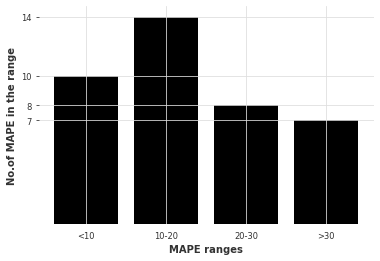

In [23]:
first=len([i for i in mape_nos if i<10])
second=len([i for i in mape_nos if i>10 and i<20])
third = len([i for i in mape_nos if i>20 and i<30])
fourth = len([i for i in mape_nos if i>30])

weights = [1,2,3,4]
bars_list = [first,second,third,fourth]

import matplotlib.pyplot as plt
x = [1, 2, 3, 4]
ax1 = plt.subplot(1,1,1)
ax1.set_xticks(x)
ax1.set_yticks(bars_list)
plt.bar(x,bars_list)
ax1.set_xticklabels(["<10","10-20","20-30",">30"]) 
ax1.set_yticklabels(bars_list)
plt.ylabel("No.of MAPE in the range")
plt.xlabel("MAPE ranges")
plt.show()